# Sequence Extraction

From `annotations.db` we extract exon information
- acceptor position
- donor position
- chromosome, transcript associated

From the `fasta` file we obtain sequences by chromosome

In [1]:
import pandas as pd

from collections import (
    defaultdict,
    namedtuple
)

from src import SequencerSpliceJunction

In [2]:
path_db = "data/annotation-004.db"
path_fa = "data/Homo_sapiens-005.fa"

In [3]:
train_chromosome = ['2','4','6','8','10','11','12','13','14','15','16','17','18','19','20','21','22','X','Y']
test_chromosome = ['1','3','5','7','9']
chromosomes = train_chromosome + test_chromosome
# chromosomes = ["Y"]
chromosomes.sort(reverse=True)

ds = SequencerSpliceJunction(
    path_annotations = path_db, 
    path_fasta = path_fa, 
    chromosomes = chromosomes,
    len_samples = 60,
    k  = 10, # samples per exon (negative) / splice-junction (positive)
)

  2%|▏         | 933/60675 [00:00<00:06, 9325.34it/s]

loading annotations
get genes id


  0%|          | 2/60675 [00:00<1:05:52, 15.35it/s]

get exon info


100%|██████████| 60675/60675 [02:41<00:00, 376.85it/s] 
0it [00:00, ?it/s]

collecting sequence by chromosome


194it [00:54,  3.57it/s]


## Exon Info: for selected chromosomes

In [4]:
df_exon = pd.DataFrame(ds.exon_info)
df_exon.head()

,id_exoninfo,chromosome,gene_id,transcript_id,exon_id,exon_number,acceptor_idx,donor_idx
0,1,1,ENSG00000223972,ENST00000456328,ENSE00002234944,1,11868,12226
1,2,1,ENSG00000223972,ENST00000450305,ENSE00001948541,1,12009,12056
2,3,1,ENSG00000223972,ENST00000450305,ENSE00001671638,2,12178,12226
3,4,1,ENSG00000223972,ENST00000456328,ENSE00003582793,2,12612,12720
4,5,1,ENSG00000223972,ENST00000450305,ENSE00001758273,3,12612,12696


In [5]:
df_exon.shape

(1428974, 8)

In [6]:
import matplotlib.pyplot as plt

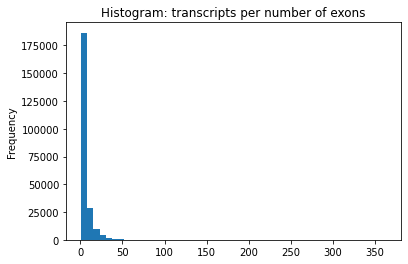

In [7]:
df_exon["transcript_id"].value_counts().plot.hist(bins=50, title="Histogram: transcripts per number of exons")
plt.show()

In [8]:
df_exon.head()

,id_exoninfo,chromosome,gene_id,transcript_id,exon_id,exon_number,acceptor_idx,donor_idx
0,1,1,ENSG00000223972,ENST00000456328,ENSE00002234944,1,11868,12226
1,2,1,ENSG00000223972,ENST00000450305,ENSE00001948541,1,12009,12056
2,3,1,ENSG00000223972,ENST00000450305,ENSE00001671638,2,12178,12226
3,4,1,ENSG00000223972,ENST00000456328,ENSE00003582793,2,12612,12720
4,5,1,ENSG00000223972,ENST00000450305,ENSE00001758273,3,12612,12696


## Length of exons
- Most of the exons (75%) has length lower than 200. 
- Negative samples depends on the length of the exons. 
- Positive samples depends on the length of two exons. 

In [9]:
df_exon["len_exon"] = df_exon.apply(lambda r: r["donor_idx"]-r["acceptor_idx"], axis=1)

In [10]:
df_exon["len_exon"].describe()

count    1.428974e+06
mean     2.610387e+02
std      6.692323e+02
min      0.000000e+00
25%      8.700000e+01
50%      1.290000e+02
75%      1.990000e+02
max      3.472990e+05
Name: len_exon, dtype: float64

<AxesSubplot:title={'center':'Lenght of exons'}, ylabel='Frequency'>

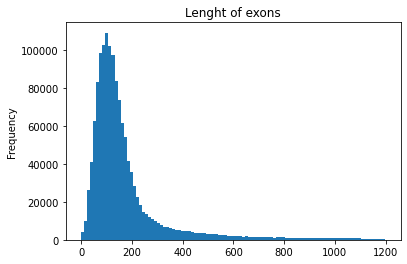

In [11]:
df_exon.len_exon[df_exon.len_exon<1200].plot.hist(bins=100, title="Lenght of exons")

In [12]:
df_exon.head()

,id_exoninfo,chromosome,gene_id,transcript_id,exon_id,exon_number,acceptor_idx,donor_idx,len_exon
0,1,1,ENSG00000223972,ENST00000456328,ENSE00002234944,1,11868,12226,358
1,2,1,ENSG00000223972,ENST00000450305,ENSE00001948541,1,12009,12056,47
2,3,1,ENSG00000223972,ENST00000450305,ENSE00001671638,2,12178,12226,48
3,4,1,ENSG00000223972,ENST00000456328,ENSE00003582793,2,12612,12720,108
4,5,1,ENSG00000223972,ENST00000450305,ENSE00001758273,3,12612,12696,84


## Save exoninfo

In [13]:
df_exon.to_csv("data/exoninfo.csv")

___ 

# Sampling of sequences
For each transcript in `.exon_info`:
1. If it contains 2 or more exons, go to step 2.
2. For each exon $e$ in the transcript sample negative cases (I discarded the transcripts with one exon)
3. For each consecutive pair of exons $e_i, e_{i+1}$ sample positive cases

### Positive Samples

In [ ]:
for chromosome in chromosomes: 
    print(chromosome)
    ds.generate_positive_samples(chromosome=chromosome, save=True)

  0%|          | 0/816 [00:00<?, ?it/s]

Y
Generating positive samples


  0%|          | 0/7169 [00:00<?, ?it/s]

X
Generating positive samples


  7%|▋         | 479/7169 [02:01<27:53,  4.00it/s]

In [ ]:
len(ds.pos_samples), ds.counter_pos

### take a look to positive samples

In [ ]:
sample = ds.pos_samples[1]
sample

In [ ]:
list(filter(lambda info: info.id_exoninfo in [sample.id_exoninfo_acceptor, sample.id_exoninfo_donor] , ds.exon_info))

### Negative Samples

In [ ]:
for chromosome in chromosomes:
    print(chromosome)
    ds.generate_negative_samples(chromosome=chromosome, allow_empty=True, save=False)

In [ ]:
len(ds.neg_samples)

### take a look to negative samples

In [ ]:
sample = ds.neg_samples[20]
sample

In [ ]:
list(filter(lambda info: info.id_exoninfo == sample.id_exoninfo , ds.exon_info))